# The Spark Foundation - Dec'20

# Exploratory Data Analysis (EDA) - Sports

Easwaramoorthy Maheswaran

## Perform EDA on Indian Premier League dataset

*** 2 datasets are available for this analysis ***
1) Deliveries  \
2) Matches

*** In addition to EDA, I performed hypothesis testing on the dataset to statistically prove the characteristic ***

In [685]:
#Import relevant Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
#Read CSV files using "pandas"
deliveries_data = pd.read_csv("deliveries.csv")
matches_data = pd.read_csv("matches.csv")

*** Data Verification & Check Data Anomalies phase ***

In [69]:
#Verify the data
deliveries_data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [70]:
#Verify the data
matches_data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [71]:
deliveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [72]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [73]:
deliveries_data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [74]:
matches_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [75]:
deliveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

*** Create Batsman stats from Deliveries Dataset ***

In [77]:
# create a new dataframe for total runs scored by batsman and sort them 
matches_per_season = deliveries_data.groupby(['batsman']).agg({'inning': 'count','batsman_runs' : 'sum', 'ball': 'sum'})
matches_per_season.rename(columns={'batsman_runs' : 'total_runs'}, inplace=True)
matches_per_season.sort_values(by='total_runs',ascending=False).reset_index()

,batsman,inning,total_runs,ball
0,V Kohli,4211,5434,14728
1,SK Raina,4044,5415,14677
2,RG Sharma,3816,4914,13479
3,DA Warner,3398,4741,11899
4,S Dhawan,3776,4632,13428
...,...,...,...,...
511,IC Pandey,2,0,9
512,J Denly,1,0,1
513,P Raj,1,0,6
514,Sunny Gupta,1,0,5


In [78]:
# Calculate the batsman strike rate and merge the stats to an existing dataframe and sort them
strike_rate = round(deliveries_data.groupby(['batsman']).agg({'batsman_runs': 'mean'})*100,2)
batsman_stat = pd.merge(matches_per_season,strike_rate,on='batsman',how='right',sort=False)
batsman_stat.rename(columns={'batsman_runs' : 'Strike_Rate_%'}, inplace=True)
batsman_stat.sort_values(by='total_runs',ascending=False).reset_index()

,batsman,inning,total_runs,ball,Strike_Rate_%
0,V Kohli,4211,5434,14728,129.04
1,SK Raina,4044,5415,14677,133.90
2,RG Sharma,3816,4914,13479,128.77
3,DA Warner,3398,4741,11899,139.52
4,S Dhawan,3776,4632,13428,122.67
...,...,...,...,...,...
511,IC Pandey,2,0,9,0.00
512,J Denly,1,0,1,0.00
513,P Raj,1,0,6,0.00
514,Sunny Gupta,1,0,5,0.00


In [79]:
# Calculate the number of centuries scored by a batsman
batsman_cen = deliveries_data.groupby(['match_id','batsman']).agg({'batsman_runs':'sum'})
batsman_cen = batsman_cen[batsman_cen['batsman_runs']>=100]
batsman_cen = batsman_cen.groupby(['batsman']).agg({'count'})
batsman_cen.columns = batsman_cen.columns.droplevel()
batsman_cen = batsman_cen.sort_values(by='count',ascending=False).reset_index()
batsman_cen.rename(columns={'count' : 'Centuries'}, inplace=True)
batsman_cen

,batsman,Centuries
0,CH Gayle,7
1,V Kohli,5
2,DA Warner,4
3,SR Watson,4
4,AB de Villiers,3
5,HM Amla,2
6,AC Gilchrist,2
7,AM Rahane,2
8,V Sehwag,2
9,BB McCullum,2


In [80]:
# Calculate the number of half centuries scored by a batsman
batsman_half_cen = deliveries_data.groupby(['match_id','batsman']).agg({'batsman_runs':'sum'})
batsman_half_cen = batsman_half_cen[batsman_half_cen['batsman_runs']>=50]
batsman_half_cen = batsman_half_cen[batsman_half_cen['batsman_runs']<100]
batsman_half_cen = batsman_half_cen.groupby(['batsman']).agg({'count'})
batsman_half_cen.columns = batsman_half_cen.columns.droplevel()
batsman_half_cen = batsman_half_cen.sort_values(by='count',ascending=False).reset_index()
batsman_half_cen.rename(columns={'count' : 'Half_Centuries'}, inplace=True)
batsman_half_cen

,batsman,Half_Centuries
0,DA Warner,44
1,V Kohli,38
2,SK Raina,38
3,S Dhawan,37
4,RG Sharma,36
...,...,...
144,S Vidyut,1
145,SA Yadav,1
146,DJ Hooda,1
147,LA Pomersbach,1


In [81]:
# Merge the centuries & half centuries data and create a new dataframe
batsman_score = pd.merge(batsman_cen,batsman_half_cen,on='batsman',how='right',sort=False)
batsman_score = batsman_score.fillna(0)
batsman_score

,batsman,Centuries,Half_Centuries
0,DA Warner,4.0,44
1,V Kohli,5.0,38
2,SK Raina,1.0,38
3,S Dhawan,0.0,37
4,RG Sharma,1.0,36
...,...,...,...
144,S Vidyut,0.0,1
145,SA Yadav,0.0,1
146,DJ Hooda,0.0,1
147,LA Pomersbach,0.0,1


In [82]:
# Merge Centuries/Half-Centuries data to batsman stats
batting_stats = pd.merge(batsman_stat,batsman_score,on='batsman',how='right')

In [83]:
# Verify the dataframe
batting_stats

,batsman,inning,total_runs,ball,Strike_Rate_%,Centuries,Half_Centuries
0,DA Warner,3398,4741,11899,139.52,4.0,44
1,V Kohli,4211,5434,14728,129.04,5.0,38
2,SK Raina,4044,5415,14677,133.90,1.0,38
3,S Dhawan,3776,4632,13428,122.67,0.0,37
4,RG Sharma,3816,4914,13479,128.77,1.0,36
...,...,...,...,...,...,...,...
144,S Vidyut,115,145,412,126.09,0.0,1
145,SA Yadav,479,608,1776,126.93,0.0,1
146,DJ Hooda,431,535,1563,124.13,0.0,1
147,LA Pomersbach,251,302,956,120.32,0.0,1


In [84]:
# Calculate the number of 6s hit by a batsman
score_6 = deliveries_data[['batsman','batsman_runs']][deliveries_data.batsman_runs==6].groupby(['batsman']).agg({'batsman_runs':'count'})
score_6.sort_values(by='batsman_runs',ascending=False).reset_index()

,batsman,batsman_runs
0,CH Gayle,327
1,AB de Villiers,214
2,MS Dhoni,207
3,SK Raina,195
4,RG Sharma,194
...,...,...
331,CK Langeveldt,1
332,JDS Neesham,1
333,SK Trivedi,1
334,D Shorey,1


In [85]:
# Calculate the number of 4s hit by a batsman
score_4 = deliveries_data[['batsman','batsman_runs']][deliveries_data.batsman_runs==4].groupby(['batsman']).agg({'batsman_runs':'count'})
score_4.sort_values(by='batsman_runs',ascending=False).reset_index()

,batsman,batsman_runs
0,S Dhawan,526
1,SK Raina,495
2,G Gambhir,492
3,V Kohli,482
4,DA Warner,459
...,...,...
405,Sandeep Sharma,1
406,S Mavi,1
407,Shivam Sharma,1
408,NS Naik,1


In [641]:
# Merge 6s/4s data to a new DataFrame
batsman_boundaries = pd.merge(score_6,score_4,on='batsman',how='right')
batsman_boundaries = batsman_boundaries.fillna(0)
batsman_boundaries.rename(columns={'batsman_runs_x' : 'No.of.Sixes', 'batsman_runs_y':'No.of.Fours'}, inplace=True)
batsman_boundaries.sort_values(by='No.of.Sixes',ascending=False).reset_index()

,batsman,No.of.Sixes,No.of.Fours
0,CH Gayle,327.0,376
1,AB de Villiers,214.0,357
2,MS Dhoni,207.0,297
3,SK Raina,195.0,495
4,RG Sharma,194.0,431
...,...,...,...
405,AR Bawne,0.0,1
406,M Klinger,0.0,9
407,RS Sodhi,0.0,1
408,AS Rajpoot,0.0,2


In [676]:
# Merge 6s/4s data frame to the existing Batting stats dataframe
batting_stats = pd.merge(batting_stats,batsman_boundaries,on='batsman',how='inner')
batting_stats = batting_stats.fillna(0)
batting_stats = batting_stats.T.drop_duplicates().T
batting_stats.sort_values(by='total_runs',ascending=False).reset_index().head(10)

,index,batsman,inning,total_runs,ball,Strike_Rate_%,Centuries,Half_Centuries,No.of.Sixes_x,No.of.Fours_x
0,1,V Kohli,4211,5434,14728,129.04,5,38,191,482
1,2,SK Raina,4044,5415,14677,133.9,1,38,195,495
2,4,RG Sharma,3816,4914,13479,128.77,1,36,194,431
3,0,DA Warner,3398,4741,11899,139.52,4,44,181,459
4,3,S Dhawan,3776,4632,13428,122.67,0,37,96,526
5,7,CH Gayle,3131,4560,11341,145.64,7,28,327,376
6,10,MS Dhoni,3318,4477,12202,134.93,0,23,207,297
7,9,RV Uthappa,3492,4446,12339,127.32,0,24,156,436
8,6,AB de Villiers,2977,4428,10826,148.74,3,34,214,357
9,5,G Gambhir,3524,4223,12619,119.84,0,36,59,492


*** Batsman Stats - Examining the data visually using pyplot ***

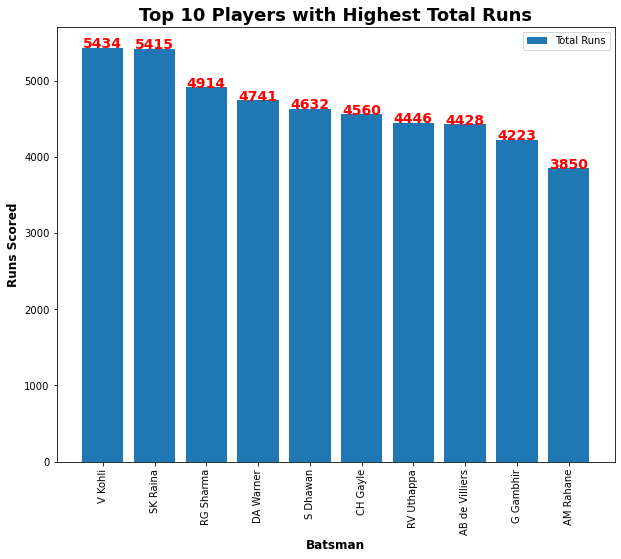

In [678]:
# Top 10 Batsman with highest total runs scored
index = np.arange(10)
batting_stats_top10 =batting_stats.head(10).sort_values(by='total_runs',ascending=False).reset_index()
plt.figure(figsize=(10,8))
plt.bar(batting_stats_top10['batsman'],batting_stats_top10['total_runs'],label='Total Runs')
plt.xticks(rotation=90)
plt.title('Top 10 Players with Highest Total Runs',size=18,weight='bold')
plt.xlabel('Batsman',size=12,weight='bold')
plt.ylabel('Runs Scored',size=12,weight='bold')
label = batting_stats_top10['total_runs']
for i in range(10):
    plt.text(x = i, y = label[i], s = label[i],size = 14, rotation = 0, color = 'red', ha='center', weight='bold')
plt.legend(loc='upper right')
plt.show()

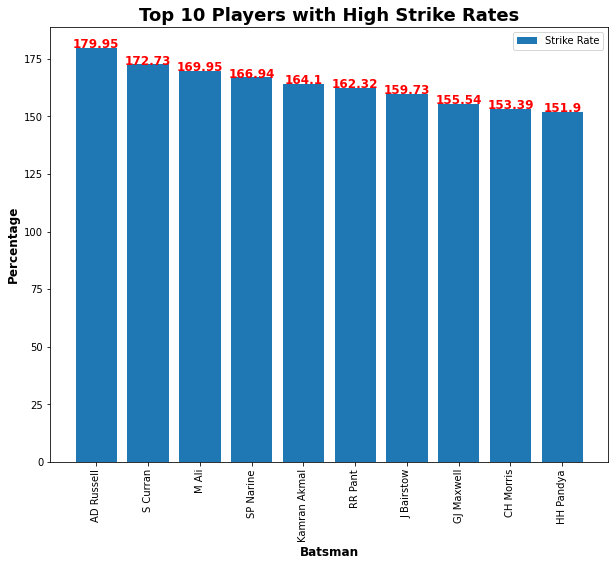

In [682]:
# Top 10 Batsman with highest strike rate
index = np.arange(10)
Highest_Strike_Rate_top10 =batting_stats.sort_values(by='Strike_Rate_%',ascending=False).reset_index().head(10)
plt.figure(figsize=(10,8))
plt.bar(Highest_Strike_Rate_top10['batsman'],Highest_Strike_Rate_top10['Strike_Rate_%'],label='Strike Rate')
plt.xticks(rotation=90)
plt.title('Top 10 Players with High Strike Rates',size=18,weight='bold')
plt.xlabel('Batsman',size=12,weight='bold')
plt.ylabel('Percentage',size=12,weight='bold')
label = Highest_Strike_Rate_top10['Strike_Rate_%']
for i in range(10):
    plt.text(x = i, y = label[i], s = label[i],size = 12, rotation = 0,color = 'red',ha='center',weight='bold')
plt.legend(loc='upper right')
plt.show()

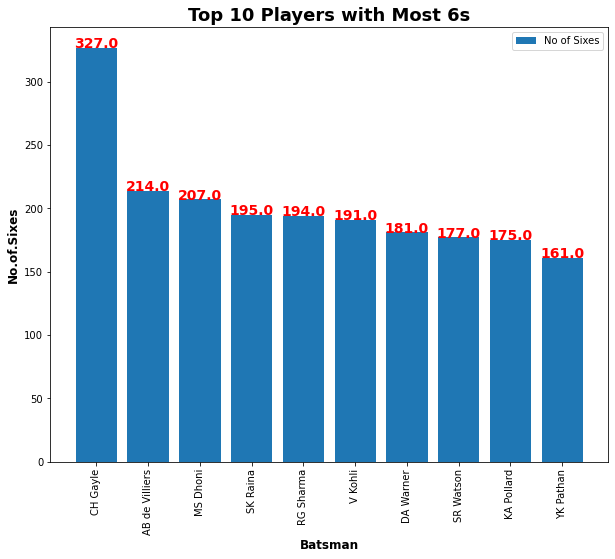

In [680]:
# Top 10 Batsman with most 6's
index=np.arange(10)
Most_Sixes_top10 =batting_stats.sort_values(by='No.of.Sixes_x',ascending=False).reset_index().head(10)
plt.figure(figsize=(10,8))
plt.bar(Most_Sixes_top10['batsman'],Most_Sixes_top10['No.of.Sixes_x'],label='No of Sixes')
plt.xticks(rotation=90)
plt.title('Top 10 Players with Most 6s',size=18,weight='bold')
plt.xlabel('Batsman',size=12,weight='bold')
plt.ylabel('No.of.Sixes',size=12,weight='bold')
label = Most_Sixes_top10['No.of.Sixes_x']
for i in range(10):
    plt.text(x = i, y = label[i], s = label[i],size = 14, rotation = 0, color = 'red', ha='center', weight='bold')
plt.legend(loc='upper right')
plt.show()

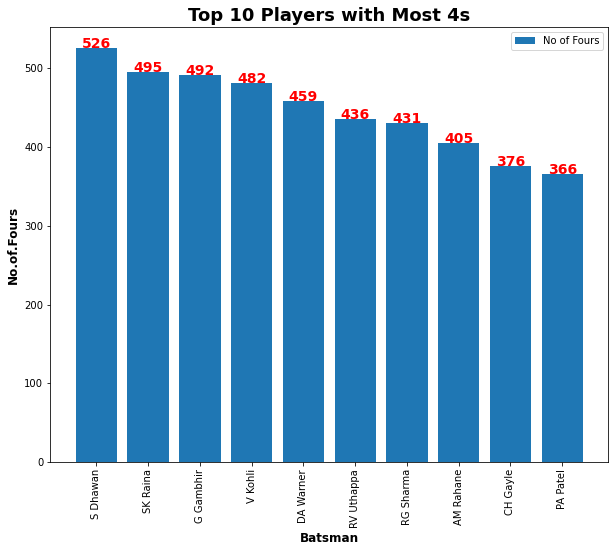

In [681]:
# Top 10 Batsman with most 4's
index = np.arange(10)
Most_Fours_top10 =batting_stats.sort_values(by='No.of.Fours_x',ascending=False).reset_index().head(10)
plt.figure(figsize=(10,8))
plt.bar(Most_Fours_top10['batsman'],Most_Fours_top10['No.of.Fours_x'],label='No of Fours')
plt.xticks(rotation=90)
plt.title('Top 10 Players with Most 4s',size=18,weight='bold')
plt.xlabel('Batsman',size=12,weight='bold')
plt.ylabel('No.of.Fours',size=12,weight='bold')
label = Most_Fours_top10['No.of.Fours_x']
for i in range(10):
    plt.text(x = i, y = label[i], s = label[i],size = 14, rotation = 0,color = 'red',ha='center',weight='bold')
plt.legend(loc='upper right')
plt.show()

*** Create Bowling Stats using Deliveries Dataset ***

In [88]:
# Display Total dismissal counts
deliveries_data.dismissal_kind.value_counts().to_frame()

,dismissal_kind
caught,5348
bowled,1581
run out,852
lbw,540
stumped,278
caught and bowled,211
retired hurt,12
hit wicket,10
obstructing the field,2


In [89]:
# Identify dismissal counts for LBW Category 
lbw_count = deliveries_data[deliveries_data['dismissal_kind']=='lbw']
lbw_count = lbw_count.groupby(['bowler']).agg({'dismissal_kind':'count'}).rename(columns={'dismissal_kind':'LBW'})
lbw_count.sort_values(by='LBW',ascending=False).reset_index()

,bowler,LBW
0,PP Chawla,16
1,SP Narine,16
2,Rashid Khan,14
3,R Ashwin,14
4,A Mishra,13
...,...,...
165,DJ Muthuswami,1
166,P Awana,1
167,NLTC Perera,1
168,N Rana,1


In [90]:
# Identify dissmissal counts for Bowled Category and merge the data with LBW Category 
bowled_count = deliveries_data[deliveries_data['dismissal_kind']=='bowled']
bowled_count = bowled_count.groupby(['bowler']).agg({'dismissal_kind':'count'}).rename(columns={'dismissal_kind':'Bowled'})
bowled_count.sort_values(by='Bowled',ascending=False).reset_index()
bowling_figures = pd.merge(bowled_count,lbw_count,on='bowler',how='inner')
bowling_figures = bowling_figures.fillna(0)
bowling_figures = bowling_figures.T.drop_duplicates().T
bowling_figures.sort_values(by='Bowled',ascending=False).reset_index()

,bowler,Bowled,LBW
0,SL Malinga,63,11
1,PP Chawla,43,16
2,SP Narine,35,16
3,B Kumar,35,8
4,Harbhajan Singh,29,8
...,...,...,...
149,CK Langeveldt,1,1
150,K Khejroliya,1,1
151,FH Edwards,1,1
152,D Wiese,1,1


In [91]:
# Identify dismissal counts for Caught & Bowled Category
caught_bowled_count = deliveries_data[deliveries_data['dismissal_kind']=='caught and bowled']
caught_bowled_count = caught_bowled_count.groupby(['bowler']).agg({'dismissal_kind':'count'}).rename(columns={'dismissal_kind':'Caught_Bowled'})
caught_bowled_count.sort_values(by='Caught_Bowled',ascending=False).reset_index()

,bowler,Caught_Bowled
0,Harbhajan Singh,10
1,DJ Bravo,8
2,SP Narine,7
3,KA Pollard,6
4,SL Malinga,5
...,...,...
101,JR Hopes,1
102,JJ Bumrah,1
103,JH Kallis,1
104,JDP Oram,1


In [92]:
# Identify dissmissal counts for Caught by Fielder Category and merge the data with Caught & Bowled Category
caught_count = deliveries_data[deliveries_data['dismissal_kind']=='caught']
caught_count = caught_count.groupby(['bowler']).agg({'dismissal_kind':'count'}).rename(columns={'dismissal_kind':'Caught_by_Fielder'})
caught_count.sort_values(by='Caught_by_Fielder',ascending=False).reset_index()
bowling_data = pd.merge(caught_bowled_count,caught_count,on='bowler',how='outer')
bowling_data = bowling_data.fillna(0)
bowling_data = bowling_data.T.drop_duplicates().T
bowling_data.sort_values(by='Caught_by_Fielder',ascending=False).reset_index()

,bowler,Caught_Bowled,Caught_by_Fielder
0,DJ Bravo,8.0,113.0
1,SL Malinga,5.0,91.0
2,A Mishra,3.0,89.0
3,UT Yadav,0.0,89.0
4,Harbhajan Singh,10.0,84.0
...,...,...,...
335,SMSM Senanayake,0.0,1.0
336,SS Mundhe,0.0,1.0
337,L Ablish,0.0,1.0
338,Swapnil Singh,1.0,0.0


In [93]:
# Merge all identified category counts to a new dataframe
bowling_info = pd.merge(bowling_figures,bowling_data,on='bowler',how='outer')
bowling_info = bowling_info.fillna(0)
bowling_info = bowling_info.T.drop_duplicates().T
bowling_info.sort_values(by='Bowled',ascending=False).reset_index()

,bowler,Bowled,LBW,Caught_Bowled,Caught_by_Fielder
0,SL Malinga,63.0,11.0,5.0,91.0
1,PP Chawla,43.0,16.0,4.0,72.0
2,SP Narine,35.0,16.0,7.0,54.0
3,B Kumar,35.0,8.0,5.0,84.0
4,Harbhajan Singh,29.0,8.0,10.0,84.0
...,...,...,...,...,...
335,D Short,0.0,0.0,0.0,1.0
336,D Willey,0.0,0.0,0.0,2.0
337,D du Preez,0.0,0.0,0.0,4.0
338,DAJ Bracewell,0.0,0.0,0.0,2.0


In [94]:
# Identify dismissal counts for Stumped Category
stumped_count = deliveries_data[deliveries_data['dismissal_kind']=='stumped']
stumped_count = stumped_count.groupby(['bowler']).agg({'dismissal_kind':'count'}).rename(columns={'dismissal_kind':'Caught_behind'})
stumped_count.sort_values(by='Caught_behind',ascending=False).reset_index()

,bowler,Caught_behind
0,A Mishra,26
1,Harbhajan Singh,18
2,PP Chawla,14
3,PP Ojha,12
4,YS Chahal,12
...,...,...
73,J Syed Mohammad,1
74,J Suchith,1
75,GJ Maxwell,1
76,N Rana,1


In [95]:
# Merge Stumped Category to an existing dataframe
bowling_stats = pd.merge(bowling_info,stumped_count,on='bowler',how='outer')
bowling_stats = bowling_stats.fillna(0)
bowling_stats = bowling_stats.T.drop_duplicates().T
bowling_stats.sort_values(by='Bowled',ascending=False).reset_index()

,bowler,Bowled,LBW,Caught_Bowled,Caught_by_Fielder,Caught_behind
0,SL Malinga,63.0,11.0,5.0,91.0,0.0
1,PP Chawla,43.0,16.0,4.0,72.0,14.0
2,SP Narine,35.0,16.0,7.0,54.0,10.0
3,B Kumar,35.0,8.0,5.0,84.0,1.0
4,Harbhajan Singh,29.0,8.0,10.0,84.0,18.0
...,...,...,...,...,...,...
338,D Willey,0.0,0.0,0.0,2.0,0.0
339,D du Preez,0.0,0.0,0.0,4.0,0.0
340,DAJ Bracewell,0.0,0.0,0.0,2.0,0.0
341,DB Ravi Teja,0.0,0.0,0.0,1.0,0.0


In [96]:
# Convert the datatypes to INT
bowling_stats['Bowled'] = bowling_stats['Bowled'].astype(int)
bowling_stats['LBW'] = bowling_stats['LBW'].astype(int)
bowling_stats['Caught_Bowled'] = bowling_stats['Caught_Bowled'].astype(int)
bowling_stats['Caught_by_Fielder'] = bowling_stats['Caught_by_Fielder'].astype(int)
bowling_stats['Caught_behind'] = bowling_stats['Caught_behind'].astype(int)

In [97]:
# Summarize the total wickets in bowling stats and sort Players by highest total wickets taken 
bowling_stats['Total_Wickets']=bowling_stats['Bowled']+bowling_stats['LBW']+bowling_stats['Caught_Bowled']+bowling_stats['Caught_by_Fielder']+bowling_stats['Caught_behind']
bowling_stats.sort_values(by='Total_Wickets',ascending=False).reset_index()

,bowler,Bowled,LBW,Caught_Bowled,Caught_by_Fielder,Caught_behind,Total_Wickets
0,SL Malinga,63,11,5,91,0,170
1,A Mishra,25,13,3,89,26,156
2,Harbhajan Singh,29,8,10,84,18,149
3,PP Chawla,43,16,4,72,14,149
4,DJ Bravo,20,6,8,113,0,147
...,...,...,...,...,...,...,...
338,GS Sandhu,0,0,0,1,0,1
339,GR Napier,0,0,0,1,0,1
340,GH Vihari,0,0,0,1,0,1
341,D Short,0,0,0,1,0,1


*** Bowling Stats - Examining the data visually using pyplot ***

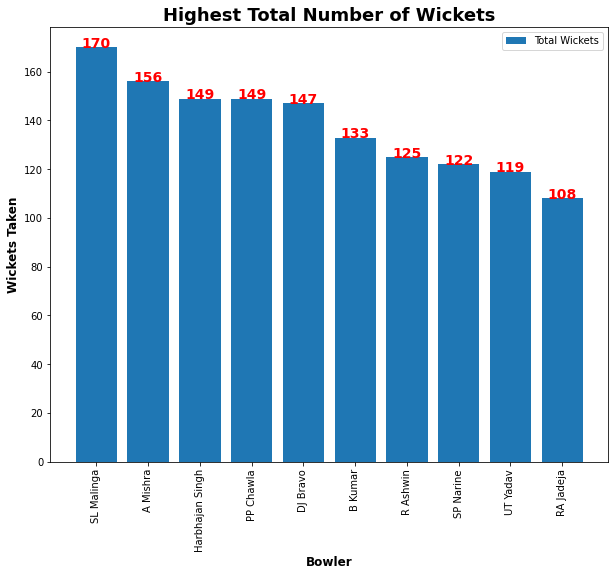

In [684]:
# Top 10 Bowlers with highest total wickets
index = np.arange(10)
bowling_stats_top10 = bowling_stats.sort_values(by='Total_Wickets',ascending=False).reset_index().head(10)
plt.figure(figsize=(10,8))
plt.bar(bowling_stats_top10['bowler'],bowling_stats_top10['Total_Wickets'],label='Total Wickets')
plt.xticks(rotation=90)
plt.title('Highest Total Number of Wickets',size=18,weight='bold')
plt.xlabel('Bowler',size=12,weight='bold')
plt.ylabel('Wickets Taken',size=12,weight='bold')
label = bowling_stats_top10['Total_Wickets']
for i in range(10):
    plt.text(x = i, y = label[i], s = label[i],size = 14, rotation = 0,color = 'red',ha='center',weight='bold')
plt.legend(loc='upper right')
plt.show()

*** Create Wicket Keeper Stats using Deliveries Dataset ***

In [98]:
#Identify the dismissal counts by Stumping & Catches by Wicket Keeper
Stumps_by_WK = deliveries_data[deliveries_data['dismissal_kind']=='stumped']['fielder'].value_counts().reset_index()
Stumps_by_WK.rename(columns={'index':'wicket_keeper','fielder':'stumping'}, inplace=True)
WK_List = Stumps_by_WK['wicket_keeper'].tolist()
Catches_by_WK = deliveries_data[(deliveries_data['dismissal_kind']=='caught') & (deliveries_data['fielder'].isin(WK_List))]['fielder'].value_counts().reset_index()
Catches_by_WK.rename(columns={'index':'wicket_keeper','fielder':'catches'}, inplace=True)
Catches_by_WK.head()

#Merge Stumps stats & Catch stats by Wicket Keeper
WK_Stats = pd.merge(Stumps_by_WK,Catches_by_WK,on='wicket_keeper',how='outer')
WK_Stats.catches = WK_Stats.catches.fillna(0)
WK_Stats['stumping']=WK_Stats['stumping'].astype(int)
WK_Stats['catches']=WK_Stats['catches'].astype(int)
WK_Stats['Total']=WK_Stats.stumping+WK_Stats.catches
WK_Stats = WK_Stats.sort_values(['Total'], ascending=False).reset_index()
WK_Stats

,index,wicket_keeper,stumping,catches,Total
0,2,KD Karthik,29,109,138
1,0,MS Dhoni,38,98,136
2,1,RV Uthappa,32,84,116
3,12,AB de Villiers,7,93,100
4,4,PA Patel,16,69,85
5,3,WP Saha,18,60,78
6,6,NV Ojha,10,65,75
7,5,AC Gilchrist,16,51,67
8,29,AT Rayudu,2,53,55
9,7,KC Sangakkara,9,45,54


*** Wicket Keeper Stats - Examining the data visually using pyplot ***

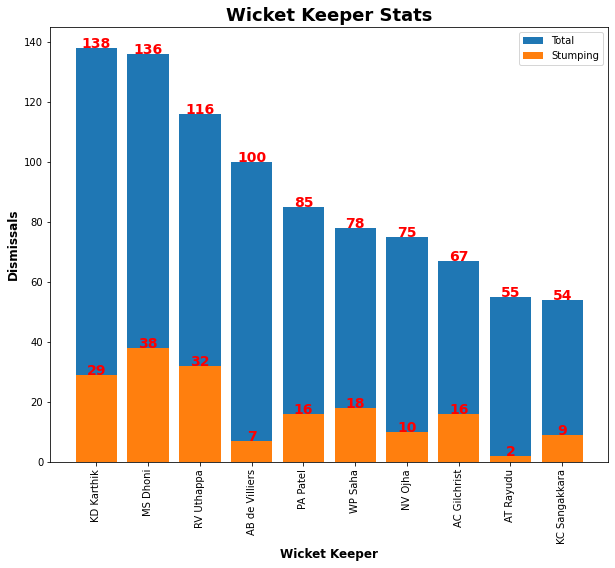

In [665]:
index = np.arange(10)
stumping_stats_top10 = WK_Stats.sort_values(by='Total',ascending=False).reset_index().head(10)
plt.figure(figsize=(10,8))
plt.bar(stumping_stats_top10['wicket_keeper'],stumping_stats_top10['Total'],label='Total')
plt.bar(stumping_stats_top10['wicket_keeper'],stumping_stats_top10['stumping'],label='Stumping')
plt.xticks(rotation=90)
plt.title('Wicket Keeper Stats',size=18,weight='bold')
plt.xlabel('Wicket Keeper',size=12,weight='bold')
plt.ylabel('Dismissals',size=12,weight='bold')
label = stumping_stats_top10['Total']
label1 = stumping_stats_top10['stumping']
for i in range(10):
    plt.text(x = i, y = label[i], s = label[i],size = 14, rotation = 0,color = 'red',ha='center',weight='bold')
    plt.text(x = i, y = label1[i], s = label1[i],size = 14, rotation = 0,color = 'red',ha='center',weight='bold')
plt.legend(loc='upper right')
plt.show()

*** Identify Player of the Match using Matches Dataset ***

In [105]:
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [106]:
#Identify the Player of the Match
man_of_match = matches_data.groupby(['player_of_match']).agg({'player_of_match':'count'}).rename(columns={'player_of_match':'count'})
man_of_match.sort_values(by='count',ascending=False).reset_index()

,player_of_match,count
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,DA Warner,17
4,RG Sharma,17
...,...,...
221,KMDN Kulasekara,1
222,KK Cooper,1
223,K Rabada,1
224,K Paul,1


*** Player of the Match Stats - Examining the data visually using pyplot ***

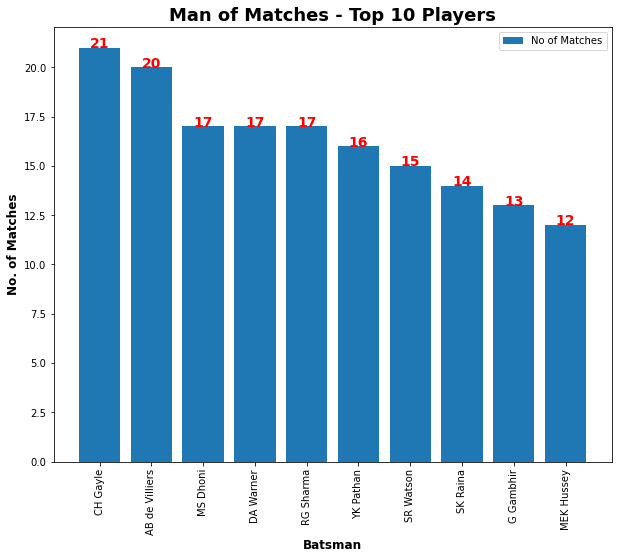

In [666]:
index = np.arange(10)
player_of_match_stats_top10 = man_of_match.sort_values(by='count',ascending=False).reset_index().head(10)
plt.figure(figsize=(10,8))
plt.bar(player_of_match_stats_top10['player_of_match'],player_of_match_stats_top10['count'],label='No of Matches')
plt.xticks(rotation=90)
plt.title('Man of Matches - Top 10 Players',size=18,weight='bold')
plt.xlabel('Batsman',size=12,weight='bold')
plt.ylabel('No. of Matches',size=12,weight='bold')
label = player_of_match_stats_top10['count']
for i in range(10):
    plt.text(x = i, y = label[i], s = label[i],size = 14, rotation = 0,color = 'red',ha='center',weight='bold')
plt.legend(loc='upper right')
plt.show()

*** Identify Most Successful Team Stats using Matches Dataset ***

In [108]:
#Identify the Most Winning team in IPL
most_winning_team = matches_data.groupby(['winner']).agg({'winner':'count'}).rename(columns={'winner':'count'})
most_winning_team.sort_values(by='count',ascending=False).reset_index()

,winner,count
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


*** Most Successful team in IPL - Examining the data visually using pyplot ***

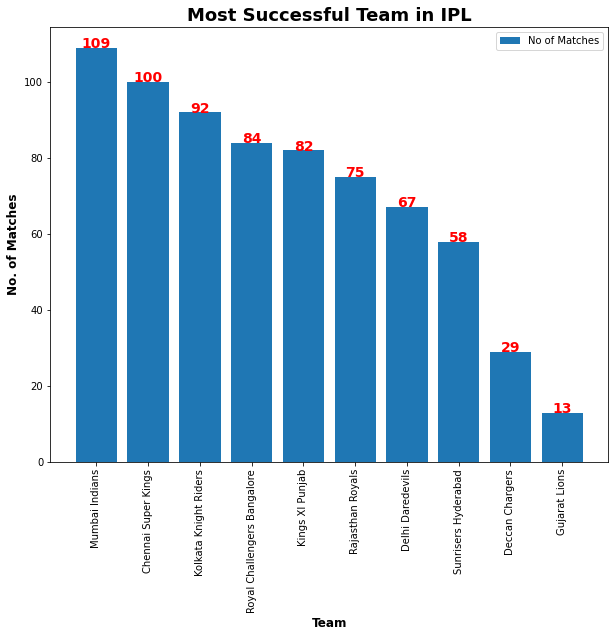

In [667]:
index=np.arange(10)
most_winning_team_stats_top10 = most_winning_team.sort_values(by='count',ascending=False).reset_index().head(10)
plt.figure(figsize=(10,8))
plt.bar(most_winning_team_stats_top10['winner'],most_winning_team_stats_top10['count'],label='No of Matches')
plt.xticks(rotation=90)
plt.title('Most Successful Team in IPL',size=18,weight='bold')
plt.xlabel('Team',size=12,weight='bold')
plt.ylabel('No. of Matches',size=12,weight='bold')
label = most_winning_team_stats_top10['count']
for i in range(10):
    plt.text(x = i, y = label[i], s = label[i],size = 14, rotation = 0,color = 'red',ha='center',weight='bold')
plt.legend(loc='upper right')
plt.show()

*** Identify Match wins per toss win or lose from matches dataset ***

In [544]:
win_per_toss_decision = matches_data[matches_data['toss_winner']==matches_data['winner']]['winner'].value_counts().reset_index().rename(columns={'index':'Teams','winner':'win_per_toss_wins'})
loss_per_toss_decision = matches_data[matches_data['toss_winner']!=matches_data['winner']]['winner'].value_counts().reset_index().rename(columns={'index':'Teams','winner':'win_per_toss_loss'})
win_loss_impact = pd.merge(win_per_toss_decision,loss_per_toss_decision,on='Teams',how='right')
win_loss_impact['total_wins']=win_loss_impact['win_per_toss_wins']+win_loss_impact['win_per_toss_loss']
win_loss_impact.sort_values(by='win_per_toss_wins',ascending=False).reset_index()

,index,Teams,win_per_toss_wins,win_per_toss_loss,total_wins
0,2,Chennai Super Kings,57,43,100
1,0,Mumbai Indians,56,53,109
2,4,Kolkata Knight Riders,53,39,92
3,6,Rajasthan Royals,42,33,75
4,3,Royal Challengers Bangalore,41,43,84
5,1,Kings XI Punjab,35,47,82
6,7,Delhi Daredevils,35,32,67
7,5,Sunrisers Hyderabad,23,35,58
8,8,Deccan Chargers,19,10,29
9,12,Gujarat Lions,10,3,13


*** Toss Stats - Examining the data visually using pyplot ***

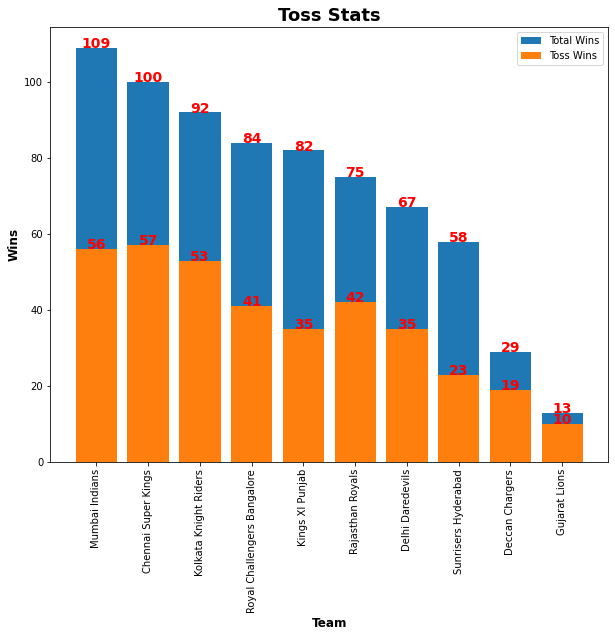

In [673]:
index = np.arange(10)
toss_stats_top10 = win_loss_impact.sort_values(by='total_wins',ascending=False).reset_index().head(10)
plt.figure(figsize=(10,8))
plt.bar(toss_stats_top10['Teams'],toss_stats_top10['total_wins'],label='Total Wins')
plt.bar(toss_stats_top10['Teams'],toss_stats_top10['win_per_toss_wins'],label='Toss Wins')
plt.xticks(rotation=90)
plt.title('Toss Stats',size=18,weight='bold')
plt.xlabel('Team',size=12,weight='bold')
plt.ylabel('Wins',size=12,weight='bold')
label = toss_stats_top10['total_wins']
label1 = toss_stats_top10['win_per_toss_wins']
for i in range(10):
    plt.text(x = i, y = label[i], s = label[i],size = 14, rotation = 0,color = 'red',ha='center',weight='bold')
    plt.text(x = i, y = label1[i], s = label1[i],size = 14, rotation = 0,color = 'red',ha='center',weight='bold')
plt.legend(loc='upper right')
plt.show()

In [220]:
field_first = analysis_data.groupby(['toss_winner','toss_decision']).agg({'win':'count'}).rename(columns={'win':'No.of.Matches'})
field_first.sort_values(by='No.of.Matches',ascending=False).reset_index()

,toss_winner,toss_decision,No.of.Matches
0,Kolkata Knight Riders,field,62
1,Royal Challengers Bangalore,field,61
2,Kings XI Punjab,field,55
3,Mumbai Indians,field,54
4,Delhi Daredevils,field,51
5,Chennai Super Kings,bat,48
6,Rajasthan Royals,field,48
7,Mumbai Indians,bat,44
8,Chennai Super Kings,field,41
9,Rajasthan Royals,bat,32


*** Winning Stats based on Toss Decision *** 

In [442]:
match_data = matches_data
i=0
toss_analysis_data = pd.DataFrame(columns=['toss_winner','winner','toss_decision','win'])
for iloc in match_data.T.iteritems():
    if (match_data.iloc[i][6]==match_data.iloc[i][10]):
        win_data = pd.DataFrame({'toss_winner': [match_data.iloc[i][6]],'winner': [match_data.iloc[i][10]],'toss_decision':[match_data.iloc[i][7]],'win':'yes'})
    else:
        win_data = pd.DataFrame({'toss_winner': [match_data.iloc[i][6]],'winner': [match_data.iloc[i][10]],'toss_decision':[match_data.iloc[i][7]],'win':'no'})
    i=i+1
    toss_analysis_data = toss_analysis_data.append(win_data)    
toss_analysis_data

,toss_winner,winner,toss_decision,win
0,Royal Challengers Bangalore,Sunrisers Hyderabad,field,no
0,Rising Pune Supergiant,Rising Pune Supergiant,field,yes
0,Kolkata Knight Riders,Kolkata Knight Riders,field,yes
0,Kings XI Punjab,Kings XI Punjab,field,yes
0,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,yes
...,...,...,...,...
0,Mumbai Indians,Mumbai Indians,field,yes
0,Chennai Super Kings,Mumbai Indians,bat,no
0,Delhi Capitals,Delhi Capitals,field,yes
0,Chennai Super Kings,Chennai Super Kings,field,yes


In [526]:
j=0;
city_analyst_data = pd.DataFrame(columns=['city','ground'])
for iloc in match_data.T.iteritems():
    if (str(match_data.iloc[j][2]) in str(match_data.iloc[j][10])):
        city_data = pd.DataFrame({'city':[match_data.iloc[j][2]],'ground':'Home'})
    else:
        city_data = pd.DataFrame({'city':[match_data.iloc[j][2]],'ground':'Away'})
    j=j+1
    city_analyst_data = city_analyst_data.append(city_data)    
city_analyst_data

,city,ground
0,Hyderabad,Home
0,Pune,Home
0,Rajkot,Away
0,Indore,Away
0,Bangalore,Home
...,...,...
0,Mumbai,Home
0,Chennai,Away
0,Visakhapatnam,Away
0,Visakhapatnam,Away


*** Winning Stats based on Toss Decision & Home Ground/Away *** 

In [606]:
analysis_data = pd.concat([toss_analysis_data,city_analyst_data],axis=1,join='outer')
analysis_data

,toss_winner,winner,toss_decision,win,city,ground
0,Royal Challengers Bangalore,Sunrisers Hyderabad,field,no,Hyderabad,Home
0,Rising Pune Supergiant,Rising Pune Supergiant,field,yes,Pune,Home
0,Kolkata Knight Riders,Kolkata Knight Riders,field,yes,Rajkot,Away
0,Kings XI Punjab,Kings XI Punjab,field,yes,Indore,Away
0,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,yes,Bangalore,Home
...,...,...,...,...,...,...
0,Mumbai Indians,Mumbai Indians,field,yes,Mumbai,Home
0,Chennai Super Kings,Mumbai Indians,bat,no,Chennai,Away
0,Delhi Capitals,Delhi Capitals,field,yes,Visakhapatnam,Away
0,Chennai Super Kings,Chennai Super Kings,field,yes,Visakhapatnam,Away


#  Conclusion

*** 1) Batsman with Highest Total Runs scored : *** Virat Kohli \
*** 2) Batsman with Highest Strike Rate : *** Andre Russell \
*** 3) Batsman with Most 6s : *** Chris Gayle \
*** 4) Batsman with Most 4s : *** Shikhar Dhawan \
*** 5) Batsman with Most Player of the Match award : *** Chris Gayle\
*** 6) Bowler with Highest Total Wickets : *** SL Malinga \
*** 7) Wicket Keeper with Highest Total Stumpings: *** MS Dhoni \
*** 8) Wicket Keeper with Highest Total Catches : *** KD Karthik \
*** 9) Most Successful Team in IPL : *** Mumbai Indians \
*** 10)Most Successful Chasing Team in IPL : *** Kolkatta Knight Riders \

*** Contributing Factors for the Win / Lose *** \
*** 1) Toss win/lose  *** \
*** 2) Home/Away Grounds *** 


# Hypothesis Testing

*** Use Statistical models to examine if there is correlation between *** \
*** 1) Toss Decision and Win/Lose a match *** \
*** 2) Ground (Home/Away) and Win/Lose a match *** 


*** Statistical models used : *** \
*** 1) Chi-Square Test *** \
*** 2) One-way Anova Test *** \
*** 3) Independent Samples T-Test *** 

*** Null Hypothesis (Ho) : *** \
*** 1) There is no relationship between Toss Decision and Win/Lose a match *** \
*** 2) There is no relationship between Ground (Home/Away) and Win/Lose a match ***

# 1) Chi-Square Test

*** Verify Relationship between Toss Decision and Win/Lose Match ***

In [578]:
decision = pd.crosstab(analysis_data['toss_decision'],analysis_data['win'])
decision

win,no,yes
toss_decision,,
bat,159,134
field,204,259


In [579]:
observed_values = decision.values
print("Observed Values:\n",observed_values)

Observed Values:
 [[159 134]
 [204 259]]


In [580]:
import scipy.stats as stats

In [581]:
val = stats.chi2_contingency(decision)
val

(7.084606429968154,
 0.0077748892876733245,
 1,
 array([[140.68650794, 152.31349206],
        [222.31349206, 240.68650794]]))

In [582]:
expected_values = val[3]
expected_values

array([[140.68650794, 152.31349206],
       [222.31349206, 240.68650794]])

In [583]:
no_of_rows=len(decision.iloc[0:2,0])
no_of_columns=len(decision.iloc[0,0:2])
dof = (no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",dof)
alpha=0.05

Degree of Freedom: 1


In [584]:
from scipy.stats import chi2
chi_square = sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi square statistic:", chi_square_statistic)

chi square statistic: 7.487898156232028


In [585]:
critical_value=chi2.ppf(q=1-alpha,df=dof)
print("Critical value:",critical_value)

Critical value: 3.841458820694124


In [586]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=dof)
print("p value:",p_value)
print("Significance level:",alpha)
print("Degree of Freedom:", dof)

p value: 0.006211501563656352
Significance level: 0.05
Degree of Freedom: 1


In [587]:
if chi_square_statistic>=critical_value:
    print("Reject NULL Hypothesis(Ho), there is a relationship between toss_decision and winning a match")
else:
    print("Retain NULL Hypothesis(Ho), there are no relationship between toss_decision and winning a match")
    
if p_value<=alpha:
    print("Reject NULL Hypothesis(Ho), there is a relationship between toss_decision and winning a match")
else:
    print("Retain NULL Hypothesis(Ho), there are no relationship between toss_decision and winning a match")

Reject NULL Hypothesis(Ho), there is a relationship between toss_decision and winning a match
Reject NULL Hypothesis(Ho), there is a relationship between toss_decision and winning a match


*** Verify Relationship between Home Ground/Away and Win/Lose Match ***

In [607]:
ground = pd.crosstab(analysis_data['win'],analysis_data['ground'])
ground

ground,Away,Home
win,,
no,245,118
yes,271,122


In [608]:
observed_values = ground.values
print("Observed Values:\n",observed_values)

Observed Values:
 [[245 118]
 [271 122]]


In [609]:
import scipy.stats as stats
val = stats.chi2_contingency(ground)
val

(0.1251278255498513,
 0.7235381518934776,
 1,
 array([[247.76190476, 115.23809524],
        [268.23809524, 124.76190476]]))

In [610]:
expected_values = val[3]
expected_values

array([[247.76190476, 115.23809524],
       [268.23809524, 124.76190476]])

In [611]:
no_of_rows=len(ground.iloc[0:2,0])
no_of_columns=len(ground.iloc[0,0:2])
dof = (no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",dof)
alpha=0.05

Degree of Freedom: 1


In [612]:
from scipy.stats import chi2
chi_square = sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi square statistic:", chi_square_statistic)

chi square statistic: 0.1865617751356011


In [613]:
critical_value=chi2.ppf(q=1-alpha,df=dof)
print("Critical value:",critical_value)

Critical value: 3.841458820694124


In [614]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=dof)
print("p value:",p_value)
print("Significance level:",alpha)
print("Degree of Freedom:", dof)

p value: 0.6657937621623271
Significance level: 0.05
Degree of Freedom: 1


In [615]:
if chi_square_statistic>=critical_value:
    print("Reject NULL Hypothesis(Ho), there is a relationship between playing in a Home Ground/Away and winning a match")
else:
    print("Retain NULL Hypothesis(Ho), there are no relationship playing in a Home Ground/Away and winning a match")
    
if p_value<=alpha:
    print("Reject NULL Hypothesis(Ho), there is a relationship between playing in a Home Ground/Away and winning a match")
else:
    print("Retain NULL Hypothesis(Ho), there are no relationship between playing in a Home Ground/Away and winning a match")

Retain NULL Hypothesis(Ho), there are no relationship playing in a Home Ground/Away and winning a match
Retain NULL Hypothesis(Ho), there are no relationship between playing in a Home Ground/Away and winning a match


# 2) One-way Anova Test

In [687]:
#Modify the Data Type for Categorical varaibles for performing "One-way Anova" Test
analysis_data.toss_decision = analysis_data.toss_decision.astype('category').cat.codes
analysis_data.win = analysis_data.win.astype('category').cat.codes
analysis_data.ground = analysis_data.ground.astype('category').cat.codes

In [688]:
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 0
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   toss_winner    756 non-null    object
 1   winner         752 non-null    object
 2   toss_decision  756 non-null    int8  
 3   win            756 non-null    int8  
 4   city           749 non-null    object
 5   ground         756 non-null    int8  
dtypes: int8(3), object(3)
memory usage: 45.8+ KB


In [689]:
#Verifying the correlation between Categorical variables
analysis_data.corr()

,toss_decision,win,ground
toss_decision,1.000000,0.099522,-0.023238
win,0.099522,1.000000,-0.015709
ground,-0.023238,-0.015709,1.000000


In [690]:
# One way Anova to verify if toss decision & team playing on home ground/away has significant impact on "Win/Lose"
from scipy import stats
F,p=stats.f_oneway(analysis_data.toss_decision, analysis_data.win, analysis_data.ground)
print("F-Statistic Value:",F)
print("P-Value:",p)

F-Statistic Value: 73.25316169266804
P-Value: 1.4897896952304592e-31


# 3) Independent Samples T-Test

In [603]:
#Two Sample T-Test to verify if toss decision has significant impact on "Win/Lose" 
import scipy.stats as stats
stats.ttest_ind(analysis_data.toss_decision,analysis_data.win,equal_var=False)

Ttest_indResult(statistic=3.6458673919367666, pvalue=0.00027553805112149444)

In [604]:
#Two Sample T-Test to verify if "Home Ground/Away" has significant impact on "Win/Losing" a match
import scipy.stats as stats
stats.ttest_ind(analysis_data.win,analysis_data.ground,equal_var=False)

Ttest_indResult(statistic=8.14361277089045, pvalue=7.980288749273184e-16)